In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

loading dataset and The target attribute is in the column loan status, which has values “Fully
Paid” for which you can assign +1 to, and “Charged off” for which you can assign -1 to. The
other records with loan status values “Current” (in both Train and Test) are not relevant
to this problem.

In [2]:
Train = pd.read_csv("loan_Train - loan_Train.csv")
Test = pd.read_csv("loan_Test - loan_Test.csv")
Train = Train[Train['loan_status']!='Current']
Test = Test[Test['loan_status']!='Current']
Train.loc[Train.loan_status == "Charged Off", "loan_status"] = -1
Train.loc[Train.loan_status == "Fully Paid", "loan_status"] = 1
Test.loc[Test.loan_status == "Charged Off", "loan_status"] = -1
Test.loc[Test.loan_status == "Fully Paid", "loan_status"] = 1

In [3]:
print(Train['loan_status'].value_counts())
print(Test['loan_status'].value_counts())

 1    20827
-1     3474
Name: loan_status, dtype: int64
 1    12123
-1     2153
Name: loan_status, dtype: int64


In [4]:
Train.shape,Test.shape

((24301, 111), (14276, 111))

# Removing columns having more than 900 null entries

In [5]:
Train_Null_features = list(Train.isnull().sum())
Test_features_Null= list(Test.isnull().sum())
null_cols_1000 =[]
null_col = []
for i in range(len(Train_Null_features)):
    if Train_Null_features[i]>900:
        
        null_cols_1000.append(Train.columns[i])
    elif Train_Null_features[i]!= 0:
        null_col.append(Train.columns[i])
        
Train1 = Train.drop(null_cols_1000,axis=1)    

null_cols_1000_t =[]
null_col_t = []
for i in range(len(Test_features_Null)):
    if Test_features_Null[i]>900:
       
        null_cols_1000_t.append(Test.columns[i])
    elif Test_features_Null[i]!= 0:
        null_col_t.append(Test.columns[i])
        
Test1 = Test.drop(null_cols_1000,axis=1)  

In [6]:
Train1.shape,Test1.shape

((24301, 53), (14276, 53))

# Filling null values of dataframe with mean and mode for continuous and categorical values respectively

In [7]:
for i in null_col:
    if isinstance(Train1[i][0],int):
        Train1[i].fillna(int(Train1[i].mean()), inplace=True)
    elif isinstance(Train1[i][0],float):
        Train1[i].fillna(Train1[i].mean(), inplace=True)
    else:
        Train1[i]=Train1[i].astype(str)
        Train1[i].fillna(Train1[i].mode(), inplace=True)
        

In [8]:
for i in null_col:
    if isinstance(Test1[i][0],int):
        Test1[i].fillna(int(Test1[i].mean()), inplace=True)
    elif isinstance(Test1[i][0],float):
        Test1[i].fillna(Test1[i].mean(), inplace=True)
    else:
        Test1[i]=Test1[i].astype(str)
        Test1[i].fillna(Test1[i].mode(), inplace=True)

In [9]:
print(Train1.isnull().sum())
print(Test1.isnull().sum())


id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [10]:
Train1.shape,Test1.shape

((24301, 53), (14276, 53))

In [11]:
x_Train = Train1.drop('loan_status', axis=1)
y_Train = Train1['loan_status']

In [12]:
x_Test = Test1.drop('loan_status', axis=1)
y_Test = Test1['loan_status']

# we have to change data to numericals before giving to a model because sklearn library won't handle string data

In [13]:
from sklearn import preprocessing

In [14]:
 
label_encoder = preprocessing.LabelEncoder()
col = x_Train.columns

for i in col:
    if isinstance(x_Train[i][0], object):
        
        x_Train[i] = x_Train[i].astype(str)
        x_Train[i]= label_encoder.fit_transform(x_Train[i])

In [15]:
 
label_encoder = preprocessing.LabelEncoder()
col = x_Test.columns

for i in col:
    if isinstance(x_Test[i][0], object):
        
        x_Test[i] = x_Test[i].astype(str)
        
        x_Test[i]= label_encoder.fit_transform(x_Test[i])
        

In [16]:
y_Train = y_Train.astype(int)
y_Test = y_Test.astype(int)
print(y_Train.dtype)
print(y_Test.dtype)

int32
int32


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [18]:
# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x_Train, y_Train)

ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x_Train.columns
ranking_df['Rank'] = rfe.ranking_

ranked = ranking_df.sort_values(by=['Rank'])

In [19]:
ranked

,Feature_name,Rank
39,recoveries,1
8,grade,2
40,collection_recovery_fee,3
43,last_credit_pull_d,4
9,sub_grade,5
41,last_pymnt_d,6
11,emp_length,7
30,total_acc,8
21,addr_state,9
15,issue_d,10


In [20]:
top_22 = list(ranked['Feature_name'])[:21]
x_Train_22 = x_Train[top_22]
x_Test_22 = x_Test[top_22]

In [21]:
x_Train_22,x_Test_22 

(       recoveries  grade  collection_recovery_fee  last_credit_pull_d  \
 0            1579      0                      996                  17   
 1               0      0                        0                   3   
 2               0      2                        0                  14   
 4               0      3                        0                  76   
 5               0      0                        0                   8   
 ...           ...    ...                      ...                 ...   
 24994           0      3                        0                  30   
 24995           0      0                        0                  76   
 24996           0      6                        0                  76   
 24997           0      5                        0                  66   
 24998           0      2                        0                  51   
 
        sub_grade  last_pymnt_d  emp_length  total_acc  addr_state  issue_d  \
 0              3            19

In [22]:
x_Test.shape,y_Test.shape

((14276, 52), (14276,))

In [23]:
x_Train.shape, y_Train.shape

((24301, 52), (24301,))

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, auc, classification_report
number_of_trees  = [10,40,70,150,190,250,310]
Accuracy = []
for i in number_of_trees:
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0,
     max_depth=1, random_state=0).fit(x_Train_22, y_Train)
    acc = clf.score(x_Test_22, y_Test)
    Accuracy.append(acc)
    pred = clf.predict(x_Test_22)
    print("Trees Count =",i,"  Accuracy =",acc)
    print( classification_report(y_Test, pred))
    print("********************************************************************************************")
    

Trees Count = 10   Accuracy = 0.9649761838049874
              precision    recall  f1-score   support

          -1       0.99      0.78      0.87      2153
           1       0.96      1.00      0.98     12123

    accuracy                           0.96     14276
   macro avg       0.98      0.89      0.92     14276
weighted avg       0.97      0.96      0.96     14276

********************************************************************************************
Trees Count = 40   Accuracy = 0.9674278509386383
              precision    recall  f1-score   support

          -1       0.97      0.81      0.88      2153
           1       0.97      1.00      0.98     12123

    accuracy                           0.97     14276
   macro avg       0.97      0.90      0.93     14276
weighted avg       0.97      0.97      0.97     14276

********************************************************************************************
Trees Count = 70   Accuracy = 0.9670075651442981
             

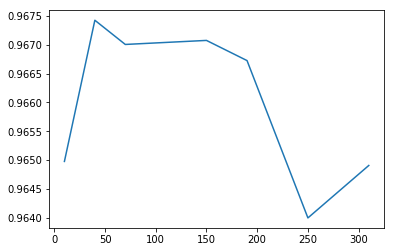

In [25]:
plt.plot(number_of_trees,Accuracy )

In [26]:
i=40
clf = GradientBoostingClassifier(n_estimators=40, learning_rate=1.0,
     max_depth=1, random_state=0).fit(x_Train_22, y_Train)
print("Trees Count =",i)
print("Accuracy =",clf.score(x_Test_22, y_Test))
pred = clf.predict(x_Test_22)

Trees Count = 40
Accuracy = 0.9674278509386383


In [27]:
from sklearn.metrics import accuracy_score, auc, classification_report
print( classification_report(y_Test, pred))

              precision    recall  f1-score   support

          -1       0.97      0.81      0.88      2153
           1       0.97      1.00      0.98     12123

    accuracy                           0.97     14276
   macro avg       0.97      0.90      0.93     14276
weighted avg       0.97      0.97      0.97     14276



In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
clf.fit(x_Train_22,y_Train)
print("Accuracy =",clf.score(x_Test_22, y_Test))
pred = clf.predict(x_Test_22)
print( classification_report(y_Test, pred))

Accuracy = 0.9508966096945923
              precision    recall  f1-score   support

          -1       0.82      0.86      0.84      2153
           1       0.97      0.97      0.97     12123

    accuracy                           0.95     14276
   macro avg       0.90      0.91      0.91     14276
weighted avg       0.95      0.95      0.95     14276

